# LSN Esercizi lezione 11
Gloria Senatore 931644

### Esercizio 11.1

#### Svolgimento

Nel presente esercizio si costruiscono alcune reti neurali formate da un solo neurone per operare la regressione lineare di dati distribuiti secondo la funzione $f(x) = 2x + 1$ e dotati di un rumore gaussiano. La rete sfrutta come ottimizzatore *stochastic gradient descent* e come *loss* la funzione *mean squared error*. Si cambiano il numero di epoche di allenamento, il numero di dati di *train* e il rumore con cui sono distribuiti i dati e si valutano le performance delle diverse reti.

#### Risultati

Prima rete:

Nella prima rete si cambia solo il rumore $\sigma$ e si osserva come cambia il potere predittivo della rete.

In [ ]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [ ]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

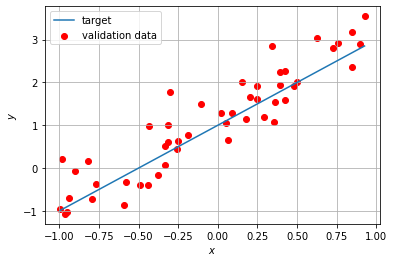

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #un solo neurone che ha solo un imput

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #stochastic gradient descent e mean squared error

In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 10ms/step - loss: 3.1486 - mse: 3.1486 - val_loss: 2.6766 - val_mse: 2.6766
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 2.4010 - mse: 2.4010 - val_loss: 2.0714 - val_mse: 2.0714
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.8837 - mse: 1.8837 - val_loss: 1.6444 - val_mse: 1.6444
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5137 - mse: 1.5137 - val_loss: 1.3328 - val_mse: 1.3328
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 1.2387 - mse: 1.2387 - val_loss: 1.0995 - val_mse: 1.0995
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0296 - mse: 1.0296 - val_loss: 0.9183 - val_mse: 0.9183
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.8663 - mse: 0.8663 - val_loss: 0.7809 - val_mse: 0.7809
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7410 - mse: 0.7

In [ ]:
# return weights and biases
model.get_weights()

[array([[1.952771]], dtype=float32), array([0.9480112], dtype=float32)]

In [ ]:
# evaluate model con i dati di validazione
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.2771 - mse: 0.2771

Test loss: 0.27714869379997253
Test accuracy: 0.27714869379997253


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032

Test loss: 0.0031573008745908737
Test accuracy: 0.0031573008745908737


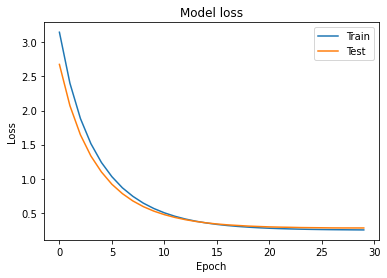

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si osserva che la *loss* sul modello è maggiore rispetto a quella della rete allenata su dati privi di rumore. Come atteso, la *loss* del *test* è sempre maggiore di quella del *train* alla fine dell'allenamento, essendo quelli di *test* dati leggermente diversi da quelli su cui si è allenata la rete. Non si è utilizzato inoltre il *layer* di *dropout* per cui non è sempre vero che la *loss* sulla validazione sia maggiore di quella sull'allenamento.

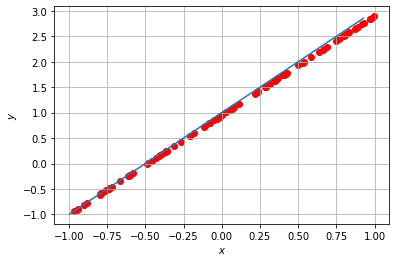

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Si nota infatti che la previsione di questa rete su nuovi dati generati nell'intervallo $[-1, 1]$ è abbastanza buona ma peggiore di quella che si aveva con i dati di *train* privi di errore.

Seconda rete:

Nella seguente rete si mantiene lo stesso rumore sui dati e si cambia il numero di dati di *train*, portandolo a *800*, e il numero di epoche, a *40*. 

In [ ]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 800)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=False)

In [ ]:
# return weights and biases
model.get_weights()

[array([[2.0072703]], dtype=float32), array([1.005466], dtype=float32)]

In [ ]:
# evaluate model con i dati di validazione
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.1795 - mse: 0.1795

Test loss: 0.179519921541214
Test accuracy: 0.179519921541214


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 4.5797e-05 - mse: 4.5797e-05

Test loss: 4.579651067615487e-05
Test accuracy: 4.579651067615487e-05


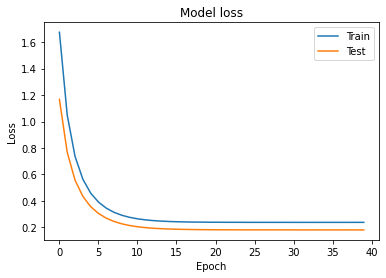

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si osserva che la *loss* sul modello è molto migliore di prima.

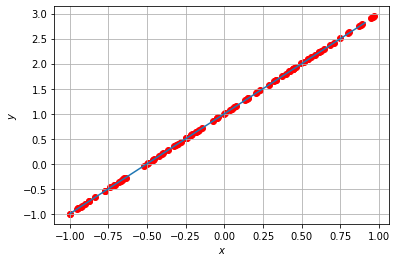

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

La predizione del valore di $f(x)$ da assegnare ad un dato valore di $x$ è infatti migliore della prima rete.

Terza rete:

Si valuta cosa succede allenando la rete per un numero di epoche molto alto.

In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=False)

In [ ]:
# return weights and biases
model.get_weights()

[array([[2.0099506]], dtype=float32), array([1.0064169], dtype=float32)]

In [ ]:
# evaluate model con i dati di validazione
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.1795 - mse: 0.1795

Test loss: 0.17952167987823486
Test accuracy: 0.17952167987823486


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 7.1261e-05 - mse: 7.1261e-05

Test loss: 7.126098353182897e-05
Test accuracy: 7.126098353182897e-05


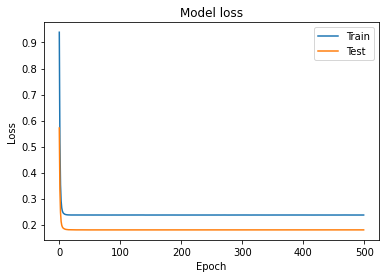

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Allenando la rete per $500$ epoche si osserva che la *loss* aumenta leggermente rispetto alla rete precedente, allenata per $40$ epoche.

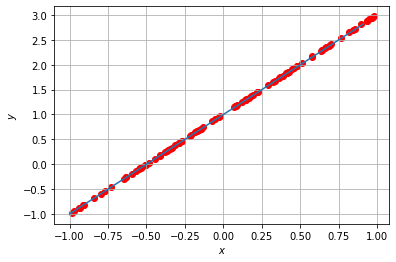

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

La predizione è lievemente peggiore rispetto alla seconda rete.

### Esercizio 11.2

#### Svolgimento

Si costruiscono alcune reti profonde per la regressione della funzione $f(x) = 4 - 3x -2x^2 + 3x^3$ con diversa profondità ed estensione, diverse funzioni d'attivazione, diversi ottimizzatori e *loss* e si valutano i risultati. Si osserva cosa accade sfruttando le reti per previsioni di dati al di fuori dell'intervallo di allenamento.

#### Risultati

Prima rete:

La prima rete conta su $1000$ dati di *train* con rumore $\sigma = 0.1$. Si compone di un primo *layer* di due neuroni, un secondo di quattro e il *layer* di *output*. La funzione di attivazione per i neuroni dei primi due strati è *ReLU*. L'ottimizzatore è *Adam* e la *loss* *mean absolute error*.

In [ ]:
# target parameters of f(x) = a1 + a2*x + a3*x^2 + a4*x^3
a1 = 4 
a2 = -3
a3 = -2
a4 = 3 

In [ ]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3 # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a1 + a2 * x_train + a3 * x_train**2 + a4 * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3, sigma)

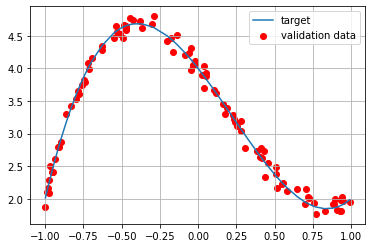

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='relu')) #layer di input, scelgo che sia composto da un solo neurone, attivato con ReLU
model.add(Dense(4, activation='relu')) #secondo layer, composto da due neuroni, sempre attivato da ReLU
model.add(Dense(1,)) #layer di output

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adam', loss='mae', metrics=['mae']) #scelgo come ottimizzatore Adam e come loss mean-absolute-error

In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=False)

In [ ]:
# return weights and biases
model.get_weights()

[array([[ 0.13857241, -1.1114652 ]], dtype=float32),
 array([-0.13876432,  0.93797547], dtype=float32),
 array([[-0.7145609 ,  0.8892085 ,  0.54092914,  0.5074629 ],
        [ 0.9748605 , -0.7827556 , -0.61456466, -0.4637804 ]],
       dtype=float32),
 array([ 0.7242935 , -0.08090791, -0.06917422, -0.06810521], dtype=float32),
 array([[ 1.808107  ],
        [-0.27478302],
        [-0.36643964],
        [-0.37373146]], dtype=float32),
 array([0.57328725], dtype=float32)]

Questi sono pesi e bias di tutti i neuroni della rete.

In [ ]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.6906 - mae: 0.6906

Test loss: 0.6905744671821594
Test accuracy: 0.6905744671821594


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.6811 - mae: 0.6811

Test loss: 0.6810943484306335
Test accuracy: 0.6810943484306335


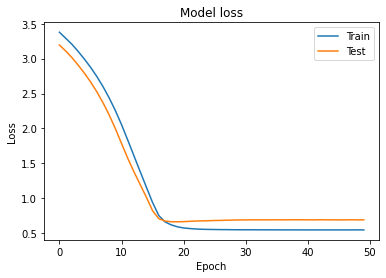

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

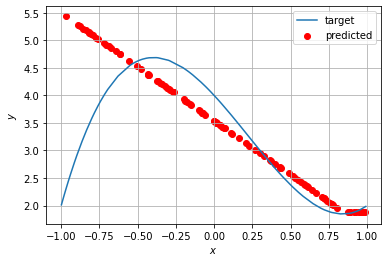

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

I risultati della regressione non sono buoni. Si procede allora sperimentando reti più complesse.

Seconda rete:

La seconda rete viene allenata con molti più dati di *train*, $8000$, ed è costituita da due *layer* nascosti composti da $10$ neuroni ciascuno e attivati dalla funzione sigmoide. Come ottimizzatore si utilizza *Nadam*.

In [ ]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 8000)
x_valid = np.random.uniform(-1, 1, 800)
x_valid.sort()
y_target = a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3 # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a1 + a2 * x_train + a3 * x_train**2 + a4 * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3, sigma)

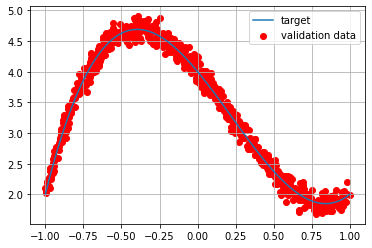

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='sigmoid')) #layer di input, composto da due neuroni, attivato con la sigmoide
model.add(Dense(10, activation='sigmoid')) #secondo layer, composto da dieco neuroni, sempre attivato dalla sigmoide
model.add(Dense(10, activation='sigmoid')) #terzo layer, composto da dieci neuroni, sempre attivato dalla sigmoide
model.add(Dense(1,)) #layer di output

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Nadam', loss='mse', metrics=['mse']) #scelgo come ottimizzatore Nadam e come loss mean-squared-error

In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=False)

In [ ]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 0s 1ms/step - loss: 0.0116 - mse: 0.0116

Test loss: 0.01155630499124527
Test accuracy: 0.01155630499124527


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    

Test loss: 0.0012415637029334903
Test accuracy: 0.0012415637029334903


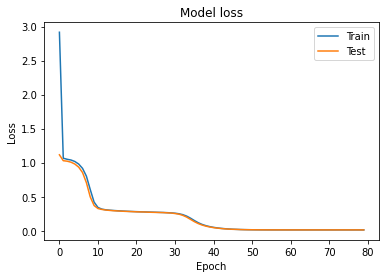

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

La *loss* su dati di *train* e *test* è minore di prima. Da cui si osserva che la rete ha settato i suoi parametri in modo da predire con minor varianza i dati di *test* e *train*. Ci si attende che essa sia quindi più performante della prima.

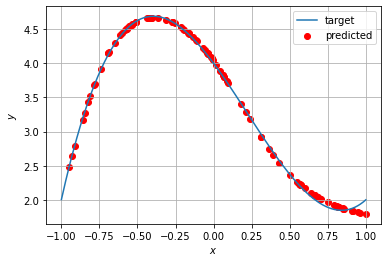

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

La capacità della predizione della rete è molto migliore di prima. I dati sono stati fittati abbastanza correttamente, con qualche problema avvicinandosi a $x = 1$.

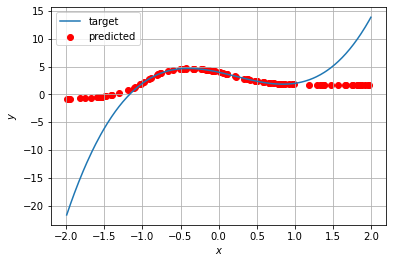

In [ ]:
x_predicted = np.random.uniform(-2, 2, 100)
x_valid = np.random.uniform(-2, 2, 800)
x_valid.sort()
y_target = a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Estendendo i dati da fittare ad un intervallo maggiore di $[-1,1]$, la capacità predittiva della rete per i dati al di fuori da questo intervallo non è buona. Non ci si può attendere un qualche potere predittivo per dati del tutto al di fuori dell'esperienza della rete.

Terza rete:

La terza rete è composta da tre *layer* nascosti composti da $5$ neuroni ciascuno attivati da *softplus*. L'ottimizzatore è *stochastic gradient descent*. La rete ha dunque un numero di parametri inferiore di quella precedente.

In [ ]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 8000)
x_valid = np.random.uniform(-1, 1, 800)
x_valid.sort()
y_target = a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3 # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a1 + a2 * x_train + a3 * x_train**2 + a4 * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3, sigma)

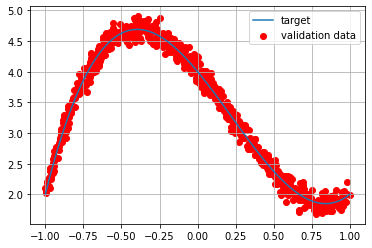

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='softplus')) #layer di input, composto da due neuroni, attivati da softplus
model.add(Dense(5, activation='softplus')) #secondo layer, composto da cinque neuroni
model.add(Dense(5, activation='softplus')) #terzo layer, composto da cinque neuroni
model.add(Dense(5, activation='softplus')) #quarto layer, composto da cinque neuroni
model.add(Dense(1,)) #layer di output

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #scelgo come ottimizzatore sgd e come loss mean-sqaured-error

In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_48 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_49 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 6         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=False)

In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 0s 1ms/step - loss: 0.0352 - mse: 0.0352

Test loss: 0.03518158942461014
Test accuracy: 0.03518158942461014


In [ ]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 0s 1ms/step - loss: 0.0449 - mse: 0.0449

Test loss: 0.04494061321020126
Test accuracy: 0.04494061321020126


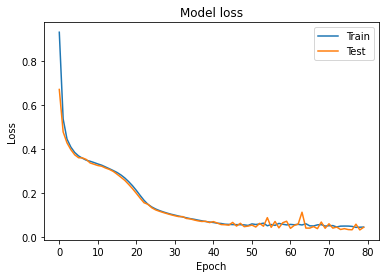

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

La *loss* su dati di allenamento e validazione è leggermente superiore come valore di quella della rete precedente.

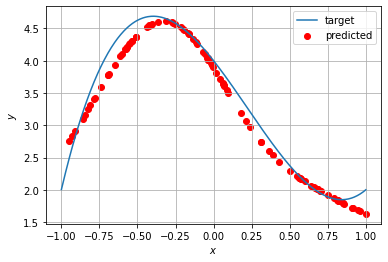

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

La rete ha una minor capacità predittiva di quella precedente, più complessa, ma è migliore rispetto alla prima rete, molto più semplice.

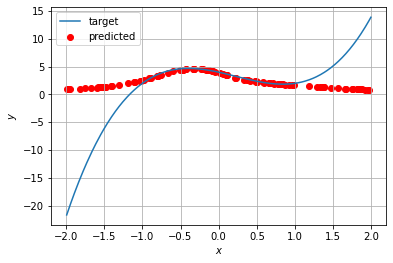

In [ ]:
x_predicted = np.random.uniform(-2, 2, 100)
x_valid = np.random.uniform(-2, 2, 800)
x_valid.sort()
y_target = a1 + a2 * x_valid + a3 * x_valid**2 + a4 * x_valid**3
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Anche in questo caso e come atteso, la rete non fitta correttamente i dati esterni all'intervallo in cui è stata allenata.

### Esercizio 11.3

#### Svolgimento

L'esercizio prevede la creazione di una rete neurale profonda per il fit di una funzione da $\mathbb{R}^2$ in $\mathbb{R}$ come $f(x, y) = \sin{(x^2 + y^2)}$, con $x$ e $y$ nel range $[-3/2, 3/2]$.

La rete che si costruisce è composta da un *layer* iniziale formato da cinque neuroni che accettano in ingresso un *input* bidimensionale, due *layer* composti da venti e dieci neuroni rispettivamente e l'ultimo *layer* di *output*. L'ottimizzatore utilizzato è *Nadam* e si considera come *loss* la *mean squared error*.

#### Risultati

In [ ]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 8000)
y_train = np.random.uniform(-1.5, 1.5, 8000)
x_valid = np.random.uniform(-1.5, 1.5, 800)
y_valid = np.random.uniform(-1.5, 1.5, 800)
x_valid.sort()
y_valid.sort()
z_target = np.sin(x_valid**2 + y_valid**2) # ideal (target) function
train_data = np.stack((x_train, y_train), axis=1)
valid_data = np.stack((x_valid, y_valid), axis=1)

sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

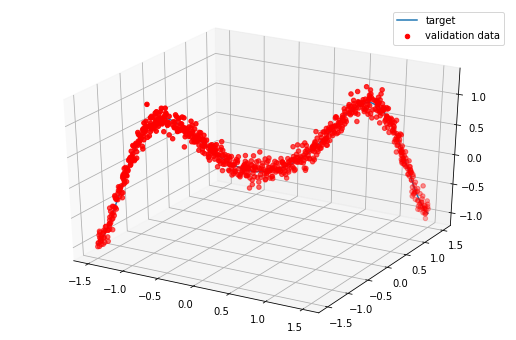

In [ ]:
# plot validation and target dataset
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot3D(x_valid, y_valid, z_target, label='target')
ax.scatter3D(x_valid, y_valid, z_valid, color='r', label='validation data')
ax.legend()
ax.grid(True)

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(2,), activation='relu')) #layer di input, composto da cinque neuroni, attivati da relu
model.add(Dense(20, activation='relu')) #secondo layer, composto da venti neuroni
model.add(Dense(10, activation='relu')) #terzo layer, composto da dieci neuroni
model.add(Dense(1,)) #layer di output

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Nadam', loss='mse', metrics=['mse']) #scelgo come ottimizzatore sgd e come loss mean-sqaured-error

In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 5)                 15        
_________________________________________________________________
dense_187 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_188 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 11        
Total params: 356
Trainable params: 356
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=train_data, y=z_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(valid_data, z_valid))

Epoch 1/40
250/250 [==============================] - 1s 2ms/step - loss: 0.1905 - mse: 0.1905 - val_loss: 0.3591 - val_mse: 0.3591
Epoch 2/40
250/250 [==============================] - 0s 2ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.3212 - val_mse: 0.3212
Epoch 3/40
250/250 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302 - val_loss: 0.2947 - val_mse: 0.2947
Epoch 4/40
250/250 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.1181 - val_loss: 0.2362 - val_mse: 0.2362
Epoch 5/40
250/250 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035 - val_loss: 0.2220 - val_mse: 0.2220
Epoch 6/40
250/250 [==============================] - 0s 1ms/step - loss: 0.0871 - mse: 0.0871 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 7/40
250/250 [==============================] - 0s 2ms/step - loss: 0.0717 - mse: 0.0717 - val_loss: 0.1250 - val_mse: 0.1250
Epoch 8/40
250/250 [==============================] - 0s 2ms/step - loss: 0.

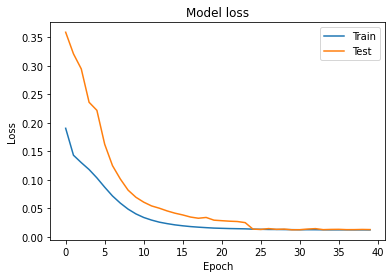

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si osserva che si raggiunge un buon valore di *loss* e, dal grafico dell'andamento di quest'ultima sui i dati di validazione in funzione del numero di epoche, sembra che non sia ancora iniziato un vistoso *overfitting* sui dati, da cui si può pensare che il numero di epoche scelto sia giusto.

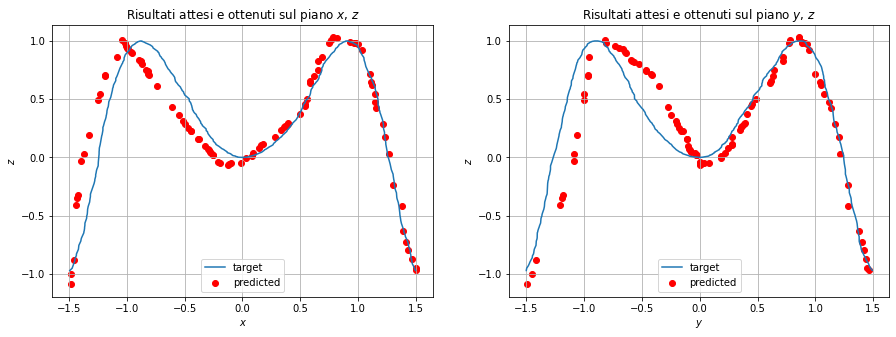

In [ ]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted.sort()
predicted_data = np.stack((x_predicted, y_predicted), axis=1)
z_predicted = model.predict(predicted_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax=ax1
ax.plot(x_valid, z_target, label='target')
ax.scatter(x_predicted, z_predicted, color='r', label='predicted')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$z$')
ax.set_title("Risultati attesi e ottenuti sul piano $x$, $z$")
ax.legend()
ax.grid(True)

ax=ax2
ax.plot(y_valid, z_target, label='target')
ax.scatter(y_predicted, z_predicted, color='r', label='predicted')
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$z$')
ax.set_title("Risultati attesi e ottenuti sul piano $y$, $z$")
ax.legend()
ax.grid(True)

La previsione della rete è abbastanza buona, seppur non precisa.